Grade=97/100

# Lab 7 - Radio Data/Dark Matter/Galactic Rotation Curve

## Introduction
This lab is about taking radio data using the dish on top of Angell Hall and using that data to calculate the galactic rotation curve for the Milky Way. Calculating this rotation curve helps to provide evidence for dark matter at large scales
in galaxies.

## Abstract
Data was taken using the radio telescope on top of Angell Hall. Several different types of data were taken, elevation and azimuth scans were taken to help write a starting code that would then be used for the data taken from the galaxy. Using the knowledge of the 21 cm radiation line for hydrogen in large gas clouds, the galaxy data was taken so that a galactic rotation curve could be calculated. Several rotation curves have been theorized for galaxies, especially our own. As you near the edge of the galaxy, theoretically things should slow down. However, this is not the case. This is one of the biggest supporting facts for the existence of dark matter.

# Methods
As already described, we took several different types of scans using the radio telescope. The scans showed the 21cm radiation line which was used in calculating velocities of hydrogen clouds. The data was reduced and analyzed using the code below, which I have annotated and will better illuminate the methods used in calculating and producing a galactic rotation curve. Some equations derived from geometries were used in order to find the radius and the velocities of the clouds at different angles. These equations can be seen in the code below.

In [2]:
"""Importing IMPORTant packages and libraries"""

import numpy as np
import matplotlib.pyplot as plt
import astropy.io
from scipy.optimize import curve_fit
import math
from scipy.interpolate import UnivariateSpline
%matplotlib inline

"""Here I am opening up one elevation file and averaging all of the scans in the file."""

root = '/Users/Erica/Desktop/'
nums = []
el_1 = open(root+'sun_elevation/sun_el_m1')
datalines = [3,7,11,15,19,23,27,31,35,39]
with el_1 as obj:
    lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        nums.append(data)
avgel = np.average(nums,axis=0)

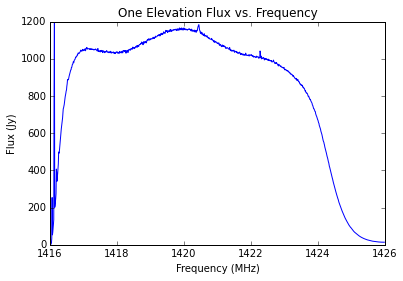

In [3]:
"""I am creating an array for the frequency, giving it the start and end values
    of the data file. The step size was given by the 'bandwith' in the file as well.
    The plot is just the average of all of the scans plotted as a function of frequency."""

freq = np.arange(1416,1426,0.009766)
plt.plot(freq,avgel)
plt.title('One Elevation Flux vs. Frequency')
plt.ylabel('Flux (Jy)')
plt.ylim(0,1200)
plt.xlabel('Frequency (MHz)')
plt.show()

In [4]:
"""This bit of code imports and reads all of the elevation data. It is the exact same as the one above, except it loops
    over all of the files, averages the spectra, and appends them to an array called 'avgel'."""

elevations = ['sun_el_m5','sun_el_m4','sun_el_m3','sun_el_m2','sun_el_m1','sun_el_p1','sun_el_p2','sun_el_p3',
              'sun_el_p4','sun_el_p5','sun_el_p6','sun_el_p7','sun_el_p8','sun_el_p9','sun_el_p10']

avgel = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(elevations)):
    num = []
    el = open(root+'sun_elevation/'+elevations[i])
    with el as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avgel.append(np.average(num,axis=0))

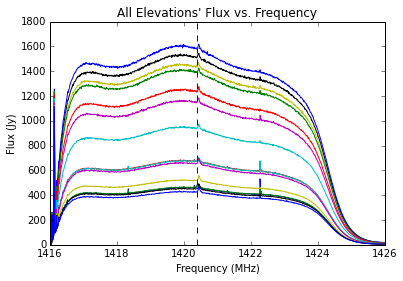

"For some reason it wouldn't let me annotated this plot either. However,this plot \nshows all of the different scans for different elevations. You can see the\n21 cm line present in all of them, denoted by the vertical dashed blue line."

In [5]:
"""I am plotting all of the different scans at different elevations."""
for i in range(len(avgel)):
    plt.plot(freq,avgel[i])
plt.title('All Elevations\' Flux vs. Frequency')
plt.ylabel('Flux (Jy)')
plt.axvline(1420.4,linestyle='--') #this is the frequency of 21cm radiation in MHz
plt.xlabel('Frequency (MHz)')
plt.show()
"""For some reason it wouldn't let me annotated this plot either. However,this plot 
shows all of the different scans for different elevations. You can see the
21 cm line present in all of them, denoted by the vertical dashed blue line."""

In [6]:
'''Here I am determining the peak 21cm radiation flux for each of the offsets.
    I am also making an array of the offsets to plot later.'''
tomax = []
for i in range(len(avgel)):
    blah = max(avgel[i][100:1000])
    tomax.append(blah)
offsets = [-5.,-4.,-3.,-2.,-1.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,]

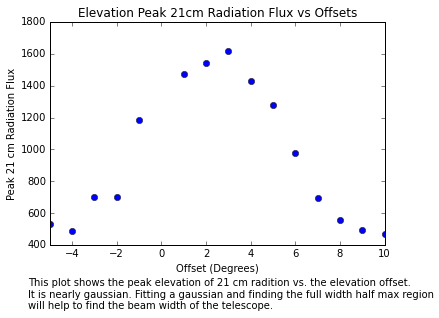

In [12]:
"""This code here is simply to plot the data that I obtained above."""
plt.plot(offsets,tomax,'o')
plt.xlim(-5,10)
plt.xlabel('Offset (Degrees)')
plt.ylabel('Peak 21 cm Radiation Flux')
plt.title('Elevation Peak 21cm Radiation Flux vs Offsets')
txt = """This plot shows the peak elevation of 21 cm radition vs. the elevation offset.
It is nearly gaussian. Fitting a gaussian and finding the full width half max region
will help to find the beam width of the telescope."""
plt.text(-6,0.1,txt)
plt.show()

Estimated Beam Width = 9.98370676108 degrees.


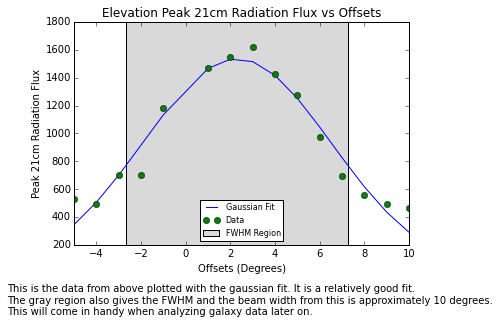

In [22]:
"""This code is used to fit a gaussian function to the data plotted above. I define a simple gaussian function and then use
curve fit to guess parameters for the equation that I give it. I then use another built in function to find the FWHM of that
equation (UnivariateSpline), which will give me the coordinates on the plot for this region."""
def gauss_function(offsets, a, x0, sigma):
    return a*np.exp(-(offsets-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, offsets, tomax)

spline = UnivariateSpline(offsets, gauss_function(offsets, *popt)-(np.max(gauss_function(offsets, *popt))/2))
r1, r2 = spline.roots()

print 'Estimated Beam Width = ' + str(r2-r1) + ' degrees.'
plt.plot(offsets, gauss_function(offsets, *popt),label='Gaussian Fit')
plt.plot(offsets,tomax,'o',label='Data')
plt.axvspan(r1, r2, facecolor = '0.85',label='FWHM Region')
plt.xlabel('Offsets (Degrees)')
plt.ylabel('Peak 21cm Radiation Flux')
plt.title('Elevation Peak 21cm Radiation Flux vs Offsets')
plt.legend(loc = 8,fontsize=8)
txt = """This is the data from above plotted with the gaussian fit. It is a relatively good fit.
The gray region also gives the FWHM and the beam width from this is approximately 10 degrees.
This will come in handy when analyzing galaxy data later on."""
plt.text(-8,-300,txt)
plt.xlim(-5,10)
plt.show()

In [23]:
"""The same procedure as was done for the elevation data will now be done for the azimuthal data."""
azimuths = ['sun-9_0.dat','sun-8_0.dat','sun-7_0.dat','sun0_-6.dat','sun-6_0.dat','sun-5_0.dat',
            'sun-4_0.dat','sun-3_0.dat','sun-2_0.dat','sun-1_0.dat','sun0_0.dat',
            'sun1_0.dat','sun2_0.dat','sun3_0.dat','sun4_0.dat','sun5_0.dat','sun6_0.dat',
            'sun7_0.dat','sun8_0.dat','sun9_0.dat','sun10_0.dat']
avgaz = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(azimuths)):
    num = []
    az = open(root+'sun_azimuth/'+azimuths[i])
    with az as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avgaz.append(np.average(num,axis=0))

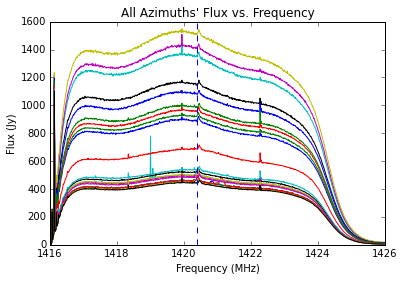

In [24]:
for i in range(len(avgaz)):
    plt.plot(freq,avgaz[i])
plt.title('All Azimuths\' Flux vs. Frequency')
plt.ylabel('Flux (Jy)')
plt.axvline(1420.4,linestyle='--') #this is the frequency of 21cm radiation in MHz
plt.xlabel('Frequency (MHz)')
plt.show()

In [25]:
tomaxaz = []
for i in range(len(avgaz)):
    blah = max(avgaz[i][100:1000])
    tomaxaz.append(blah)

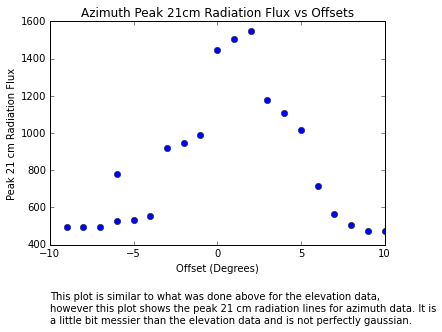

In [31]:
offaz = [-9,-8,-7,-6,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
plt.plot(offaz,tomaxaz,'o')
plt.xlabel('Offset (Degrees)')
plt.ylabel('Peak 21 cm Radiation Flux')
plt.title('Azimuth Peak 21cm Radiation Flux vs Offsets')
txt = """This plot is similar to what was done above for the elevation data,
however this plot shows the peak 21 cm radiation lines for azimuth data. It is
a little bit messier than the elevation data and is not perfectly gaussian."""
plt.text(-10,-20,txt)
plt.show()

Estimated Beam Width = 12.8318357456 degrees.


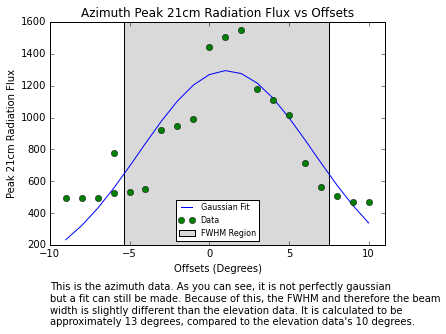

In [34]:
"""Again, this is the exact same thing as I did above for the elevation data."""
def gauss_functionz(offaz, a, x0, sigmaz):
    return a*np.exp(-(offaz-x0)**2/(2*sigmaz**2))
popt, pcov = curve_fit(gauss_functionz, offaz, tomaxaz)

splinez = UnivariateSpline(offaz, gauss_functionz(offaz, *popt)-(np.max(gauss_functionz(offaz, *popt))/2))
r1z, r2z = splinez.roots()
print 'Estimated Beam Width = ' + str(r2z-r1z) + ' degrees.'

plt.plot(offaz, gauss_functionz(offaz, *popt),label='Gaussian Fit')
plt.plot(offaz,tomaxaz,'o',label='Data')
plt.axvspan(r1z,r2z, facecolor = '0.85',label='FWHM Region')
plt.xlabel('Offsets (Degrees)')
plt.ylabel('Peak 21cm Radiation Flux')
plt.title('Azimuth Peak 21cm Radiation Flux vs Offsets')
txt = """This is the azimuth data. As you can see, it is not perfectly gaussian
but a fit can still be made. Because of this, the FWHM and therefore the beam
width is slightly different than the elevation data. It is calculated to be
approximately 13 degrees, compared to the elevation data's 10 degrees."""
plt.text(-10,-300,txt)
plt.legend(loc = 8,fontsize=8)
plt.xlim(-10,11)
plt.show()

In [35]:
"""I am now starting to work the galaxy data and begin by using the same procedures as above to import, average, and plot
the calibration data and the actual data."""
cal = ['calib_5m.dat']
avgcal = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(cal)):
    num = []
    c = open(root+'Radio_Data_Galaxy/'+cal[i])
    with c as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avgcal.append(np.average(num,axis=0))

In [36]:
"""This data here is actual data taken from the galaxy. The last loop in the this cell is where I subtract the calibration
data, theoretically background noise, so that hopefully all that is left in the galaxy data is the 21 cm line from hydrogen
clouds."""
galaxy = ['Gal_0_5m.dat','Gal10_5m.dat','Gal20_5m.dat','Gal30_5m.dat','Gal40_5m.dat',
          'Gal50_5m.dat','Gal60_5m.dat','Gal70_5m.dat','Gal80_5m.dat','Gal90_5m.dat']
avggal = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(galaxy)):
    num = []
    g = open(root+'Radio_Data_Galaxy/'+galaxy[i])
    with g as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avggal.append(np.average(num,axis=0))
avgal = []
for i in range(len(avggal)):
    new = avggal[i]-avgcal[0]
    avgal.append(new)

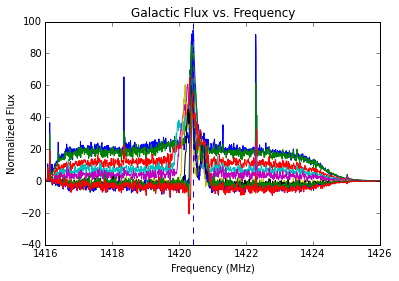

'For some reason it would not let me annotate this plot. But this plot shows the flux vs frequency of all\ndegree offsets for the galaxy data. The background noise has been subtracted using the calibration, so now\n(mostly) all that is left is the 21 cm radiation.'

In [42]:
"""This code is similar to what I did above for elevation and azimuth, but it is now with the galaxy data."""
for i in range(len(avgal)):
    plt.plot(freq,avgal[i])
plt.title('Galactic Flux vs. Frequency')
plt.ylabel('Normalized Flux')
plt.axvline(1420.4,linestyle='--') #this is the frequency of 21cm radiation in MHz
plt.xlabel('Frequency (MHz)')
plt.show()

"""For some reason it would not let me annotate this plot. But this plot shows the flux vs frequency of all
degree offsets for the galaxy data. The background noise has been subtracted using the calibration, so now
(mostly) all that is left is the 21 cm radiation."""

In [43]:
"""To find the minimum velocity, I simply zoomed into each data set and found where the minimum 21cm radiation was.
I then put this data into a list and subtracted the actual 21cm velocity to get the difference. This was used in
calculating the doppler velocities, seen in the last loop of this cell."""
tocm = 1420.4
tomaxg = [1420.3,1420.2,1419.8,1419.8,1419.9,1420,1420.1,1420.3,1420.3,1420.3]
tocmin = []
for i in range(len(tomaxg)):
    new = tocm-tomaxg[i]
    tocmin.append(new)
tocv = []
for i in range(len(tocmin)):
    n = (tocmin[i]/tocm)*2.99e5
    tocv.append(n)

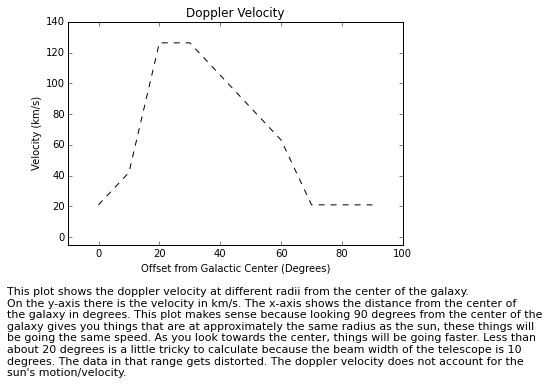

In [44]:
"""Here I am plotting the doppler velocity I calculated above against the offset from the center of the galaxy."""
degs = np.arange(0,100,10)
plt.plot(degs,tocv,'k--')
plt.xlim(-10,100)
plt.ylim(-5,140)
plt.xlabel('Offset from Galactic Center (Degrees)')
plt.ylabel('Velocity (km/s)')
plt.title('Doppler Velocity')
txt = """This plot shows the doppler velocity at different radii from the center of the galaxy. 
On the y-axis there is the velocity in km/s. The x-axis shows the distance from the center of 
the galaxy in degrees. This plot makes sense because looking 90 degrees from the center of the 
galaxy gives you things that are at approximately the same radius as the sun, these things will 
be going the same speed. As you look towards the center, things will be going faster. Less than 
about 20 degrees is a little tricky to calculate because the beam width of the telescope is 10 
degrees. The data in that range gets distorted. The doppler velocity does not account for the 
sun's motion/velocity."""
plt.text(-30,-90,txt,color='k',fontsize=11)
plt.show()

In [45]:
"""Using known values, I am now adjusting the doppler velocities to get real velocities and correcting for the 
movement of the sun."""
ro = 8
vo = 230
v = []
r = []
for i in range(len(tocv)):
    new = abs((vo+tocv[i])*np.sin(np.deg2rad(degs[i])))
    v.append(new)
for i in range(len(degs)):
    new = abs(ro*np.sin(np.deg2rad(degs[i])))
    r.append(new)

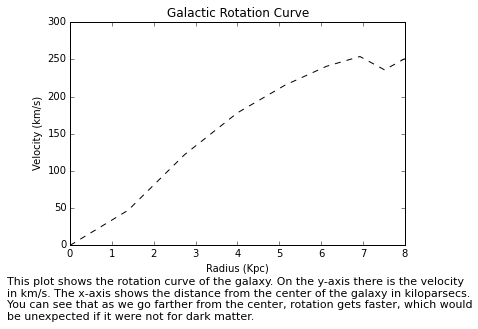

In [46]:
plt.plot(r,v,'k--')
plt.xlabel('Radius (Kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Galactic Rotation Curve')
txt = """This plot shows the rotation curve of the galaxy. On the y-axis there is the velocity 
in km/s. The x-axis shows the distance from the center of the galaxy in kiloparsecs. 
You can see that as we go farther from the center, rotation gets faster, which would 
be unexpected if it were not for dark matter."""
plt.text(-1.5,-100,txt,color='k',fontsize=11)
plt.show()

## Results
The results of this data and my calculations using my code have produced a proper prediction consistent with dark matter. As you
get farther away from the center of the galaxy, things begin to move faster. This is not what is expected in a traditional sense, as things would get faster as you move away from them, like in typical orbits of the solar system. These results point to something else that is causing this increase in velocity, aka dark matter.

## Conclusion
This lab was extremely interesting, as it was something that was abstract made tangible. Everyone always says that the rotation curve and dark matter are a thing that is important, however actually calculating it using real data was very interesting and enjoyable. There were many parts of the code that did not seem obvious, such as the curve fitting and deriving the equations for the radius and corrected velocities of the gas clouds. We also used different modes of data inputting this time around as there were only a few lines of the data files that we were interested in.